In [ ]:
import pandas as pd
path = "/home/font/Data/MM/HMP/"

HMPaddress = 'HMPaddress.csv'
df_HMPaddress = pd.read_csv((path+HMPaddress))

HMP = 'HMP_2.csv'
df_HMP = pd.read_csv((path+HMP))
# df_HMP['stats'] = df_HMPaddress['stats']

In [25]:
# 计算单因子指标,S为背景值
df_HMP_p_2 = df_HMP.mean()/[1,3.6,130,31,13.2,35,12.3,31,69,1]
df_HMP_p_2

df_trjl = pd.DataFrame()
df_trjl['区域一'] = df_HMP.loc[df_HMP['stats']  == 1].drop(['ID','stats'],axis=1).mean()
df_trjl['区域二'] = df_HMP.loc[df_HMP['stats']  == 2].drop(['ID','stats'],axis=1).mean()
df_trjl['区域三'] = df_HMP.loc[df_HMP['stats']  == 3].drop(['ID','stats'],axis=1).mean()
df_trjl['区域四'] = df_HMP.loc[df_HMP['stats']  == 4].drop(['ID','stats'],axis=1).mean()
df_trjl['区域五'] = df_HMP.loc[df_HMP['stats']  == 5].drop(['ID','stats'],axis=1).mean()
df_trjl

,区域一,区域二,区域三,区域四,区域五
As,6.283333,6.854412,4.044091,5.560153,6.191471
Cd,279.714286,366.347059,152.319697,336.620611,258.650000
Cr,51.285238,45.307941,38.959697,51.790763,42.636765
Cu,47.243333,57.294118,17.317273,52.310229,28.984412
Hg,89.709286,264.111471,40.956061,126.732366,114.592353
Ni,17.858571,18.727059,15.453788,16.458397,15.170294
Pb,64.768571,83.455000,36.555909,61.456107,55.805882
Zn,155.272381,204.750294,73.294242,188.509008,117.914412


In [14]:
# 计算单因子指标,S为国家二级标准
df_HMP_p = df_HMP/[1,25,300,300,100,500,50,300,250,1]
# 计算单因子指标,S为背景值
df_HMP_p_2 = df_HMP/[1,3.6,130,31,13.2,35,12.3,31,69,1]

df_HMP_1 = df_HMP_p.loc[df_HMP_p['stats']  == 1].drop(['ID','stats'],axis=1)
df_HMP_2 = df_HMP_p.loc[df_HMP_p['stats']  == 2].drop(['ID','stats'],axis=1)
df_HMP_3 = df_HMP_p.loc[df_HMP_p['stats']  == 3].drop(['ID','stats'],axis=1)
df_HMP_4 = df_HMP_p.loc[df_HMP_p['stats']  == 4].drop(['ID','stats'],axis=1)
df_HMP_1.head()

,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn
9,0.3668,0.956667,0.146467,0.4577,0.336,0.394,0.209133,0.89264
10,0.2288,0.645667,0.267833,0.2657,0.222,0.396,0.192133,0.35632
13,0.4580,3.481667,0.315933,1.3697,0.404,0.446,1.574933,2.40816
15,0.3136,1.159667,0.192167,0.9714,0.426,0.392,0.236067,1.22896
17,0.2204,0.857333,0.182133,0.2901,0.208,0.264,0.292267,0.89308


In [15]:
import math
def Nemerow(DataFrame,axis=0):
    resultNumber = DataFrame.mean(axis=axis) ** 2 + DataFrame.max(axis=axis) ** 2
    resultNumber = (resultNumber/2)
    return resultNumber
print("单因子系数使用国家二级标准(中性土壤)")
list_Nemerow = []
for j in [1,2,3,4,5]:
    list_area =[]
    df_HMP_area = df_HMP_p.loc[df_HMP_p['stats']  == j].drop(['ID','stats'],axis=1)
#     print("\n当前区域为:",j)
#     print('\n',df_HMP_area.head(),'\n')
    for i in range(len(list(Nemerow(df_HMP_area)))):
#         print(list(df_HMP_area.columns)[i] ,'--内梅罗系数-->',math.sqrt(list(Nemerow(df_HMP_area))[i]))
        list_area.append(math.sqrt(list(Nemerow(df_HMP_area))[i]))        
    list_Nemerow.append(list_area)
pd_Nemerow = pd.DataFrame(list_Nemerow)
pd_Nemerow.columns = df_HMP_area.columns
pd_Nemerow.index = [1,2,3,4,5]
pd_Nemerow

单因子系数使用国家二级标准(中性土壤)


,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn
1,0.369413,2.548660,0.423701,1.791065,0.788096,0.512090,1.124061,1.758549
2,0.648247,2.716862,0.233086,2.219490,2.574240,0.573882,1.043540,2.794981
3,0.331222,1.025614,0.418759,0.503447,0.298126,1.069510,0.281818,0.682232
4,0.866594,2.235289,0.731553,1.999004,2.692976,0.450572,0.428601,2.473568
5,0.373906,2.223047,0.248190,1.033873,1.900962,0.464101,0.444299,1.275968


<Figure size 1008x864 with 0 Axes>

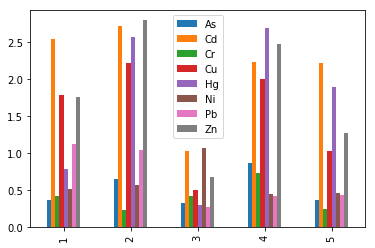

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,12))
pd_Nemerow.plot(kind='bar')
plt.show()

In [17]:
list_area_all =[]
for i in range(len(list(Nemerow(pd_Nemerow,axis=1)))):
    list_area_all.append(math.sqrt(list(Nemerow(pd_Nemerow,axis=1))[i]))        

pd_Nemerow_all = pd.DataFrame(list_area_all)
pd_Nemerow_all.columns = ['城区综合内梅罗系数']
pd_Nemerow_all.index = [1,2,3,4,5]
pd_Nemerow_all

,城区综合内梅罗系数
1,1.981366
2,2.277460
3,0.859075
4,2.174473
5,1.722359


In [18]:
print("单因子系数使用背景值(平均值)")
list_Nemerow_2 = []
for j in [1,2,3,4,5]:
    list_area =[]
    df_HMP_area = df_HMP_p_2.loc[df_HMP_p_2['stats']  == j].drop(['ID','stats'],axis=1)
#     print("\n当前区域为:",j)
#     print('\n',df_HMP_area.head(),'\n')
    for i in range(len(list(Nemerow(df_HMP_area)))):
#         print(list(df_HMP_area.columns)[i] ,'--内梅罗系数-->',math.sqrt(list(Nemerow(df_HMP_area))[i]))
        list_area.append(math.sqrt(list(Nemerow(df_HMP_area))[i]))        
    list_Nemerow_2.append(list_area)
pd_Nemerow_2 = pd.DataFrame(list_Nemerow_2)
pd_Nemerow_2.columns = df_HMP_area.columns
pd_Nemerow_2.index = [1,2,3,4,5]
pd_Nemerow_2

单因子系数使用背景值(平均值)


,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn
1,2.565370,5.881523,4.100330,13.568672,11.258516,2.081665,10.878009,6.371553
2,4.501714,6.269680,2.255669,16.814321,36.774858,2.332854,10.098778,10.126741
3,2.300151,2.366801,4.052505,3.813990,4.258940,4.347602,2.727274,2.471856
4,6.018016,5.158359,7.079544,15.143967,38.471092,1.831595,4.147749,8.962204
5,2.596566,5.130108,2.401843,7.832368,27.156606,1.886589,4.299668,4.623073
